**This is a preliminary ML script to determine the best models for our project data.**

In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

**Import 2017 sample of 25,000 observations.**  Note import warning:"Columns (29,30,39,40) have mixed types. Specify dtype option on import or set low_memory=False."

In [64]:
#To-Do: move in original sample file w/ filtering code for PR and NM county of note
filepath = os.path.abspath(os.path.join( "..", "fixtures", "hmda2017sample_droppr.csv"))
DATA = pd.read_csv(filepath, low_memory=False)

**Drop features which are redundant or have mostly missing data + Drop first column
ALSO: drop msamd_name and census_tract_number, as they make each bin of data too granular**

In [65]:
DATA = DATA.drop(DATA.columns[0], axis=1)

DATA = DATA.drop(['rate_spread', 
        'state_name', 
        'sequence_number', 
        'respondent_id',
        'msamd_name',
        'edit_status_name', 
        'denial_reason_name_3', 
        'denial_reason_name_2', 
        'denial_reason_name_1', 
        'co_applicant_race_name_5', 
        'co_applicant_race_name_4', 
        'co_applicant_race_name_3', 
        'co_applicant_race_name_2',
        'census_tract_number',
        'application_date_indicator', 
        'applicant_race_name_5', 
        'applicant_race_name_4', 
        'applicant_race_name_3', 
        'applicant_race_name_2', 
        'agency_name'], 
        axis=1)


In [66]:
DATA.describe(include='all')

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_abbr,purchaser_type_name,...,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,as_of_year,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_abbr,action_taken_name
count,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,21721.000000,24955,24955,...,24955,24955,24955,24955,24955.0,24955,24955,24955,24955,24955
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,10,...,1097,5,8,5,NaN,4,7,4,6,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,Loan was not originated or was not sold in cal...,...,Cook County,No co-applicant,No co-applicant,No co-applicant,NaN,Male,White,Not Hispanic or Latino,HUD,Loan originated
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2746,12929,...,739,13109,13109,13109,NaN,14011,16127,16985,12268,12726
mean,111.371689,5714.737327,31.073899,1454.292967,1983.547425,236.708115,70820.492887,105.683118,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN
std,40.074857,3295.761737,26.308950,891.319903,1096.849392,827.045134,13701.672815,142.302775,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37900.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN
25%,85.475002,3824.000000,10.080000,920.000000,1341.000000,108.000000,62100.000000,50.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN
50%,106.360001,5125.000000,22.040001,1320.000000,1814.000000,180.000000,69200.000000,78.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN
75%,131.635002,6766.000000,46.110001,1792.000000,2387.000000,282.000000,75700.000000,121.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN


**https://www.geeksforgeeks.org/clean-the-string-data-in-the-given-pandas-dataframe/**

In [67]:
def Format_county_data(df): 
    # iterate over all the rows 
    cloc = df.columns.get_loc('county_name')
    for i in range(df.shape[0]): 
  
        # reassign the values to the product column 
        # we first strip the whitespaces using strip() function 
        # then we capitalize the first letter using capitalize() function 
        
        df.iat[i, cloc]= df.iat[i, cloc].replace(" County", "")
        df.iat[i, cloc]= df.iat[i, cloc].replace("'", "")
        df.iat[i, cloc]= df.iat[i, cloc].replace("McKean", "Mc Kean")
        df.iat[i, cloc]= df.iat[i, cloc].replace("LaPorte", "La Porte")
        df.iat[i, cloc]= df.iat[i, cloc].replace("O'Brien","Obrien")

  
Format_county_data(DATA) 

**Import data on county types from the American Communities Project.  Data available at: https://www.americancommunities.org/methodology/**

In [68]:
countytype_filepath = os.path.abspath(os.path.join( "..", "fixtures", "americancommunities_formatted082019.csv"))
CountyTypeDF = pd.read_csv(countytype_filepath, low_memory=False)
CountyTypeDF.describe(include='all')

,county_name,state_abbr,fips,county_type
count,3143,3137,3143.000000,3143
unique,1877,51,NaN,15
top,Washington,TX,NaN,Rural Middle America
freq,30,254,NaN,599
mean,NaN,NaN,30390.411709,NaN
std,NaN,NaN,15164.717720,NaN
min,NaN,NaN,1001.000000,NaN
25%,NaN,NaN,18178.000000,NaN
50%,NaN,NaN,29177.000000,NaN
75%,NaN,NaN,45082.000000,NaN


In [69]:
print("DATA dimensions: {}".format(DATA.shape))
print("CountyTypeDF dimensions: {}".format(CountyTypeDF.shape))

DATA dimensions: (24955, 27)
CountyTypeDF dimensions: (3143, 4)


In [70]:
DATA = pd.merge(DATA, 
        CountyTypeDF,
        on = ['state_abbr','county_name'],
        how = 'left',
        indicator = True
        )

In [71]:
#TO-DO: resolve 120 unmerged values
print("DATA dimensions: {}".format(DATA.shape))
DATA.describe(include='all')

DATA dimensions: (24955, 30)


,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_abbr,purchaser_type_name,...,co_applicant_ethnicity_name,as_of_year,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_abbr,action_taken_name,fips,county_type,_merge
count,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,21721.000000,24955,24955,...,24955,24955.0,24955,24955,24955,24955,24955,24955.000000,24955,24955
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,10,...,5,NaN,4,7,4,6,7,NaN,15,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,Loan was not originated or was not sold in cal...,...,No co-applicant,NaN,Male,White,Not Hispanic or Latino,HUD,Loan originated,NaN,Urban Suburbs,both
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2746,12929,...,13109,NaN,14011,16127,16985,12268,12726,NaN,5780,24955
mean,111.371689,5714.737327,31.073899,1454.292967,1983.547425,236.708115,70820.492887,105.683118,NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,27726.941695,NaN,NaN
std,40.074857,3295.761737,26.308950,891.319903,1096.849392,827.045134,13701.672815,142.302775,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,16514.244461,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37900.000000,1.000000,NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN
25%,85.475002,3824.000000,10.080000,920.000000,1341.000000,108.000000,62100.000000,50.000000,NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,12095.000000,NaN,NaN
50%,106.360001,5125.000000,22.040001,1320.000000,1814.000000,180.000000,69200.000000,78.000000,NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,26099.000000,NaN,NaN
75%,131.635002,6766.000000,46.110001,1792.000000,2387.000000,282.000000,75700.000000,121.000000,NaN,NaN,...,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,42095.000000,NaN,NaN


In [72]:
DATA = DATA.drop(['county_name', 
        'fips',
        '_merge'], 
        axis=1)

In [74]:
tofilepath = os.path.abspath(os.path.join( "..", "fixtures", "countymergeresult08172019.csv"))
DATA.to_csv(tofilepath, index=False)

**Write the initial script using subset of features which are already int or float, plus the target** 

**IDEAS: discard file closed, call 'application approved but not accepted" a 1 or discard, discard 'application withdrawn by applicant'.  Concern about overfitting if we leave too much stuff in.**

In [75]:
DATA['action_taken'] = DATA.action_taken_name.apply(lambda x: 1 if x in ['Loan purchased by the institution', 'Loan originated'] else 0)
pd.crosstab(DATA['action_taken_name'],DATA['action_taken'], margins=True)

action_taken,0,1,All
action_taken_name,,,
Application approved but not accepted,699,0,699
Application denied by financial institution,3917,0,3917
Application withdrawn by applicant,2949,0,2949
File closed for incompleteness,1096,0,1096
Loan originated,0,12726,12726
Loan purchased by the institution,0,3566,3566
Preapproval request denied by financial institution,2,0,2
All,8663,16292,24955


**ACTION: look at imputing income using hud household median income rather than mean**

In [76]:
DATA_targ_numeric = DATA[['action_taken',
            'tract_to_msamd_income', 
            'population', 
            'minority_population', 
            'number_of_owner_occupied_units', 
            'number_of_1_to_4_family_units', 
            'loan_amount_000s', 
            'hud_median_family_income', 
            'applicant_income_000s' 
            ]]
#resolve missing values in applicant_income_000s
DATA_targ_numeric.fillna(DATA_targ_numeric.mean(), inplace=True)
DATA_targ_numeric.info()
DATA_basefile = DATA_targ_numeric

C:\Users\akx00\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24955 entries, 0 to 24954
Data columns (total 9 columns):
action_taken                      24955 non-null int64
tract_to_msamd_income             24955 non-null float64
population                        24955 non-null int64
minority_population               24955 non-null float64
number_of_owner_occupied_units    24955 non-null int64
number_of_1_to_4_family_units     24955 non-null int64
loan_amount_000s                  24955 non-null int64
hud_median_family_income          24955 non-null int64
applicant_income_000s             24955 non-null float64
dtypes: float64(3), int64(6)
memory usage: 1.9 MB


**Use one-hot encoding via Pandas, concatenate to the rest of the data frame.**

Reference link:
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

In [77]:
DATA = DATA.drop(['action_taken_name'], axis=1)
DATA.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'state_abbr', 'purchaser_type_name', 'property_type_name',
       'preapproval_name', 'owner_occupancy_name', 'loan_type_name',
       'loan_purpose_name', 'lien_status_name', 'hoepa_status_name',
       'co_applicant_sex_name', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_abbr',
       'county_type', 'action_taken'],
      dtype='object')

In [78]:
non_categorical_features = ['action_taken',
                        'tract_to_msamd_income', 
                        'population', 
                        'minority_population', 
                        'number_of_owner_occupied_units', 
                        'number_of_1_to_4_family_units', 
                        'loan_amount_000s', 
                        'hud_median_family_income', 
                        'applicant_income_000s'
                       ]

In [79]:
for categorical_feature in list(DATA.columns):
    if categorical_feature not in non_categorical_features:
        DATA[categorical_feature] = DATA[categorical_feature].astype('category')
        dummies = pd.get_dummies(DATA[categorical_feature], prefix=categorical_feature)
        DATA_basefile = pd.concat([DATA_basefile, dummies], axis=1)
        
DATA_basefile.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24955 entries, 0 to 24954
Data columns (total 145 columns):
action_taken                                                                                                     int64
tract_to_msamd_income                                                                                            float64
population                                                                                                       int64
minority_population                                                                                              float64
number_of_owner_occupied_units                                                                                   int64
number_of_1_to_4_family_units                                                                                    int64
loan_amount_000s                                                                                                 int64
hud_median_family_income                             

In [80]:
tofilepath = os.path.abspath(os.path.join( "..", "fixtures", "hmda2017sample_alltest_countymerge.csv"))
DATA_basefile.to_csv(tofilepath, index=False)

In [81]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*DATA_basefile.shape))

# Determine the frequency of each class
print(pd.crosstab(index=DATA['action_taken'], columns="count"))

24955 instances with 145 features

col_0         count
action_taken       
0              8663
1             16292


## Classification 


In [82]:
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

In [83]:
X = DATA_basefile[DATA_basefile.columns[1:]]
y = DATA_basefile['action_taken']

In [84]:
def score_model(X, y, model, **kwargs):
    """
    Test various estimators.
    """ 
    #NOTE: for capstone add X_test, X_train, Y_test, Y_train for capstone code.  
    #Bake into model to see if it does cross validation, if not there do CV.
   
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
        
    # Append our scores to the tracker
    scores['precision'].append(metrics.precision_score(expected, predicted, average="binary"))
    scores['recall'].append(metrics.recall_score(expected, predicted, average="binary"))
    scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
    scores['f1'].append(metrics.f1_score(expected, predicted, average="binary"))
        
    # Compute and return F1 (harmonic mean of precision and recall), Precision, Recall, Accuracy   
    print("{}".format(model.__class__.__name__))    
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())

In [85]:
# Try them all!
models = [
    GaussianNB(), 
    MultinomialNB(),
    BernoulliNB(),
    tree.DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs', max_iter=6000), 
    LogisticRegressionCV(cv=3, max_iter=6000), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]
for model in models:
    score_model(X, y, model)

GaussianNB
Validation scores are as follows:

precision    0.984595
recall       0.780690
accuracy     0.848848
f1           0.870866
dtype: float64
MultinomialNB
Validation scores are as follows:

precision    0.725308
recall       0.556224
accuracy     0.572751
f1           0.629612
dtype: float64
BernoulliNB
Validation scores are as follows:

precision    0.978352
recall       0.815554
accuracy     0.867802
f1           0.889566
dtype: float64
DecisionTreeClassifier
Validation scores are as follows:

precision    1.000000
recall       0.999939
accuracy     0.999960
f1           0.999969
dtype: float64


C:\Users\akx00\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
Validation scores are as follows:

precision    0.973290
recall       0.814142
accuracy     0.864075
f1           0.886631
dtype: float64
LogisticRegression
Validation scores are as follows:

precision    0.655822
recall       0.993555
accuracy     0.655380
f1           0.790111
dtype: float64
LogisticRegressionCV
Validation scores are as follows:

precision    0.666831
recall       0.994721
accuracy     0.672090
f1           0.798423
dtype: float64
BaggingClassifier
Validation scores are as follows:

precision    0.998635
recall       0.987724
accuracy     0.991104
f1           0.993149
dtype: float64
ExtraTreesClassifier
Validation scores are as follows:

precision    1.000000
recall       0.999939
accuracy     0.999960
f1           0.999969
dtype: float64
RandomForestClassifier
Validation scores are as follows:

precision    1.000000
recall       0.999939
accuracy     0.999960
f1           0.999969
dtype: float64


In [ ]:
svc_models = [
    LinearSVC(max_iter=6000)
    ]
for model in svc_models:
    score_model(X, y, model)

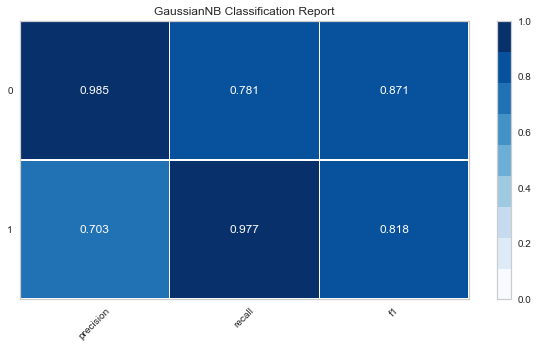

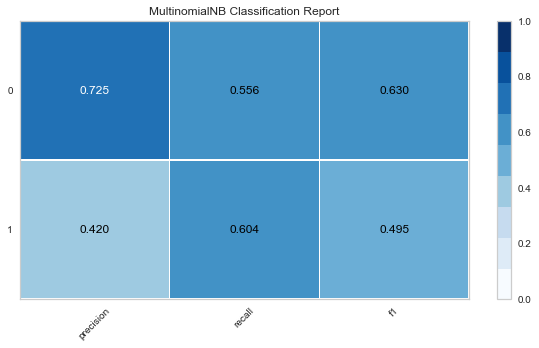

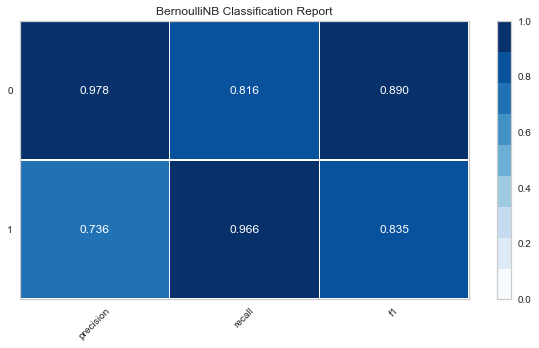

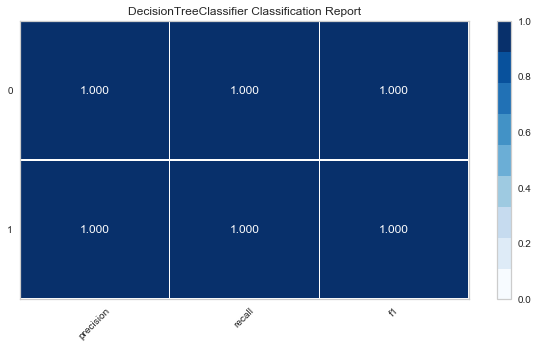

C:\Users\akx00\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


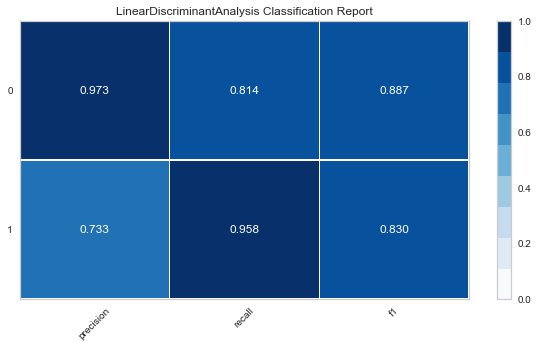

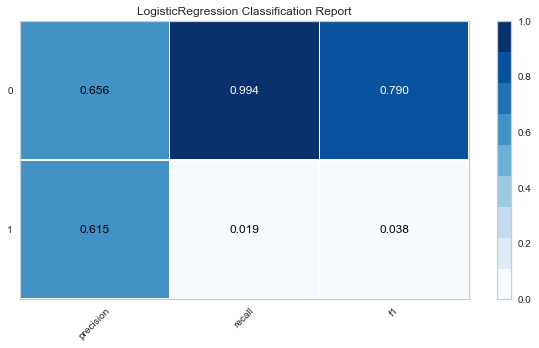

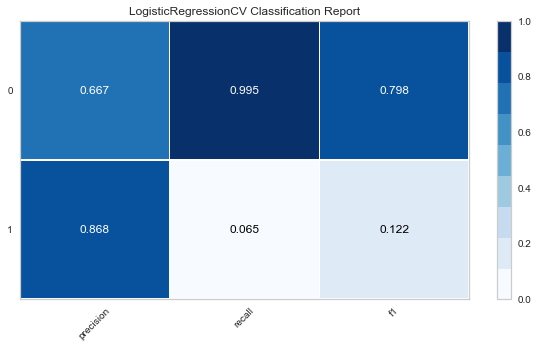

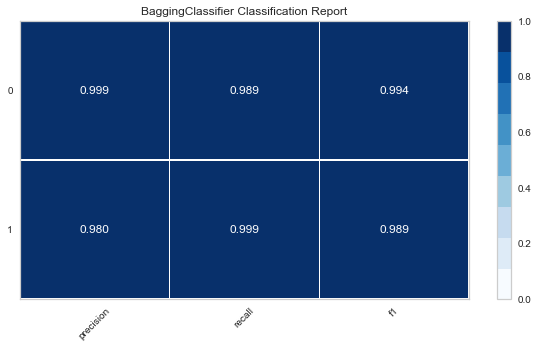

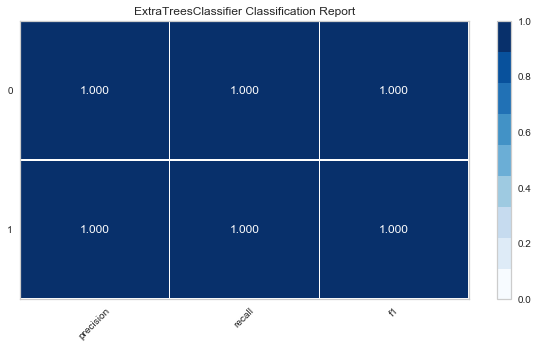

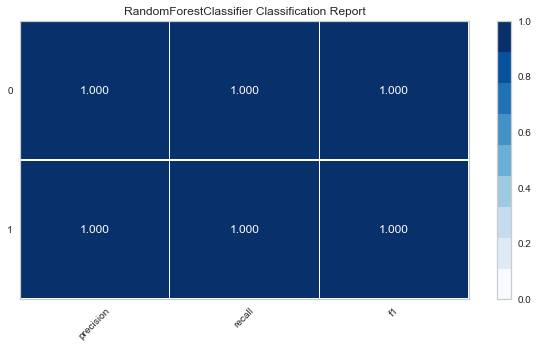

In [86]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=[1,0], 
        cmap="Blues", size=(600, 360)
    )
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

for model in models:
    visualize_model(X, y, model)